Enter time step: .0001
Enter the number of grid points: 40
Solution is expected to be stable
[[1.36588161e-08 2.82915854e-04 6.37906939e-03 ... 1.00048977e+00
  1.00048977e+00 1.00048977e+00]
 [5.34089677e-08 4.24274285e-04 7.70043996e-03 ... 1.00048977e+00
  1.00048977e+00 1.00048977e+00]
 [3.61896624e-07 9.62530313e-04 1.20849868e-02 ... 1.00048977e+00
  1.00048977e+00 1.00048977e+00]
 ...
 [3.34059531e-06 3.52878268e-03 3.31634786e-02 ... 1.00048977e+00
  1.00048977e+00 1.00048977e+00]
 [5.71716955e-07 1.67955163e-03 2.22361277e-02 ... 1.00048977e+00
  1.00048977e+00 1.00048977e+00]
 [1.65189142e-07 1.16379072e-03 1.87866655e-02 ... 1.00048977e+00
  1.00048977e+00 1.00048977e+00]]
(40, 1000)
(40, 1000)
(40, 1000)


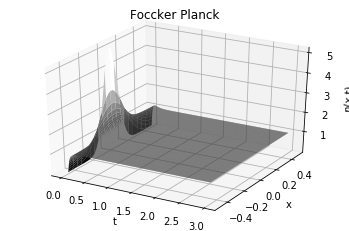

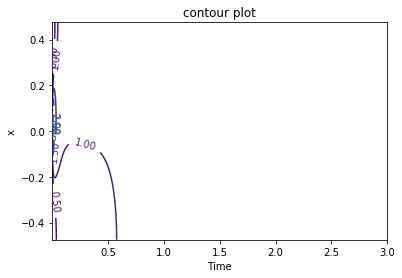

In [5]:

# using the Forward Time Centered Space (FTCS) scheme.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt


#* Initialize parameters (time step, grid spacing, etc.).
tau = float(input('Enter time step: '))
N = int(input('Enter the number of grid points: '))
N=N+2  #virtual points on either side due to refelcting boundary conditions

L = 1.        # The system extends from x=-L/2 to x=L/2
h = L/(N-1)   # Grid size
kappa = 1.    # Diffusion coefficient
f=1.
zeta=1.
coeff1 = kappa*tau/h**2
coeff2=-f*tau/(2*zeta*h)
if coeff1 < 0.5 :
    print('Solution is expected to be stable')
else:
    print('WARNING: Solution is expected to be unstable')


#* Set initial and boundary conditions.
tt = np.zeros(N)                # Initialize temperature to zero at all points
tt[int(N/2)] = 1./h             # Initial cond. is assumed to be delta function in center
#tt[int(N/2)] = 5.
## The boundary conditions are tt[0] = tt[N-1] = 0

#* Set up loop and plot variables.
xplot = np.arange(N-2)*h - L/2+h    # Record the x scale for plots
iplot = 0                        # Counter used to count plots
nstep = 30000                    # Maximum number of iterations
nplots = 1000                    # Number of snapshots (plots) to take
plot_step = nstep/nplots         # Number of time steps between plots


#* Loop over the desired number of time steps.
ttplot = np.empty((N-2,nplots))
tplot = np.empty(nplots)
for istep in range(nstep):  ## MAIN LOOP ##
    
    #* Compute new density using FTCS scheme.
    tt[1:(N-1)] = ( tt[1:(N-1)] + coeff1*( tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)] ) + coeff2*(tt[2:N]-tt[0:(N-2)] ))
    tt[0]=tt[2]
    tt[N-1]=tt[N-3]

    #* Periodically record temperature for plotting.
    if (istep+1) % plot_step < 1 :         # Every plot_step steps
        ttplot[:,iplot] = np.copy(tt[1:(N-1)])      # record tt(i) for plotting
        tplot[iplot] = (istep+1)*tau       # Record time for plots
        iplot += 1


print(ttplot)
#* Plot density versus x and t as a wire-mesh plot
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection = '3d')
Tp, Xp = np.meshgrid(tplot, xplot)
print(Tp.shape)
print(Xp.shape)
print(ttplot.shape)

ax.plot_surface(Tp, Xp, ttplot, rstride=2, cstride=2, cmap=cm.gray)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('n(x,t)')
ax.set_title('Foccker Planck')
plt.show()

#* Plot temperature versus x and t as a contour plot

levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels) 
plt.clabel(ct, fmt='%1.2f') 
plt.xlabel('Time')
plt.ylabel('x')
plt.title('contour plot')
plt.show()